In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input
from tensorflow.keras.utils import to_categorical

In [ ]:
dataset = "/content/drive/MyDrive/Dataset/lfw-deepfunneled"

In [ ]:
def generate_dataset(size, classes=5, noise=10.5):
    # Generate random datapoints
    labels = np.random.randint(0, classes, size)
    x1 = (np.random.rand(size) + labels) / classes
    x2 = x1**2 + np.random.rand(size) * noise
    
    # Reshape data in order to merge them
    x1 = x1.reshape(size, 1)
    x2 = x2.reshape(size, 1)
    labels = labels.reshape(size, 1)
   
    # Merge the data
    data = np.hstack((x1, x2, labels))
    return data

In [ ]:
dataset = generate_dataset(100)

In [ ]:
dataset

array([[1.33180026e-01, 9.92222207e+00, 0.00000000e+00],
       [1.56841836e-01, 1.74235345e+00, 0.00000000e+00],
       [7.27414243e-01, 3.30580448e+00, 3.00000000e+00],
       [6.82014606e-01, 7.62424126e+00, 3.00000000e+00],
       [5.05881303e-01, 9.70137720e+00, 2.00000000e+00],
       [2.44692690e-01, 7.08986589e+00, 1.00000000e+00],
       [5.20245993e-01, 6.13615958e+00, 2.00000000e+00],
       [8.96780989e-03, 2.83997944e+00, 0.00000000e+00],
       [3.37096385e-01, 6.48235817e+00, 1.00000000e+00],
       [3.44283500e-01, 1.05744687e+01, 1.00000000e+00],
       [1.17355128e-01, 3.92563888e+00, 0.00000000e+00],
       [2.81446499e-01, 4.89973135e+00, 1.00000000e+00],
       [9.01399823e-01, 1.82317907e+00, 4.00000000e+00],
       [2.03912374e-01, 5.74268552e+00, 1.00000000e+00],
       [3.28422918e-01, 1.02741019e+01, 1.00000000e+00],
       [8.95849060e-01, 1.77754963e+00, 4.00000000e+00],
       [5.98418983e-01, 9.16509235e+00, 2.00000000e+00],
       [4.99893880e-02, 4.38918

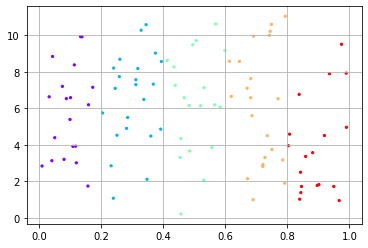

In [ ]:
plt.scatter(dataset[:, 0], dataset[:, 1], c=dataset[:,2], s=5, cmap='rainbow')
plt.grid()
plt.show()

In [ ]:
X = dataset[:, :2]
Y = dataset[:, 2]

In [ ]:
X.shape, Y.shape

((100, 2), (100,))

In [ ]:
le = LabelEncoder()

le.fit(Y)

labels = le.classes_

print("Y :", Y[0])

Y = le.transform(Y)
print("Y (label encoding):", Y[0])

Y = to_categorical(Y)
print("Y (categorical):", Y[0])

Y : 0.0
Y (label encoding): 0
Y (categorical): [1. 0. 0. 0. 0.]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,   # input data
                                                    Y,   # target/output data 
                                                    test_size=0.25, 
                                                    random_state=42)

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape,  y_test.shape)

(75, 2) (75, 5) (25, 2) (25, 5)


In [ ]:
def simple_model(input_dim):
    
    model = Sequential()
    
    model.add(Dense(64, 
                    activation= 'relu',
                    input_shape=(input_dim,)))
    model.add(Dense(128, activation= 'relu',))
    model.add(Dense(32, activation= 'relu',))
    model.add(Dense(5)) # equal to number of classes
    model.add(Activation("sigmoid"))
    
    # print model network
    model.summary() 
    
    # config model : add optimizer, loss & metrics
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics = ['accuracy'])

    return model

In [ ]:
input_dim = x_train.shape[1]  

EPOCHS = 100
BATCH_SIZE = 64

model = simple_model(input_dim)

history = model.fit(x_train, 
                    y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split=0.25   # 25% of train dataset will be used as validation set
                    )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 5)                 165       
                                                                 
 activation (Activation)     (None, 5)                 0         
                                                                 
Total params: 12,805
Trainable params: 12,805
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 2

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred[0]

array([0.9161147 , 0.935457  , 0.8789282 , 0.51113605, 0.08218789],
      dtype=float32)

In [ ]:
y_test.argmax(axis=1)[0] # get actual/target class

1

In [ ]:
y_pred.max(axis=1)[0]*100 # get confidence level (%) 

93.54569911956787

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(5, 5))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

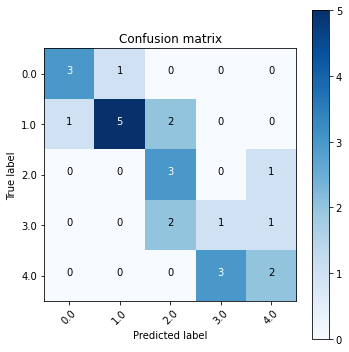

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=labels,normalize=False,
                      title='Confusion matrix')

In [ ]:
print(classification_report(y_test.argmax(axis=1), 
                            y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.83      0.62      0.71         8
           2       0.43      0.75      0.55         4
           3       0.25      0.25      0.25         4
           4       0.50      0.40      0.44         5

    accuracy                           0.56        25
   macro avg       0.55      0.55      0.54        25
weighted avg       0.60      0.56      0.56        25



In [ ]:
from keras.layers import Conv2D, MaxPool2D, Flatten

In [ ]:
def detect_face(img):
    img = img[70:195,78:172]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (50, 50))
    return img

In [ ]:
def print_progress(val, val_len, folder, bar_size=20):
    progr = "#"*round((val)*bar_size/val_len) + " "*round((val_len - (val))*bar_size/val_len)
    if val == 0:
        print("", end = "\n")
    else:
        print("[%s] (%d samples)\t label : %s \t\t" % (progr, val+1, folder), end="\r")

In [ ]:
import os

In [ ]:
dataset_folder = "/content/drive/MyDrive/Dataset/lfw-deepfunneled/lfw-deepfunneled/"

names = []
images = []
for folder in os.listdir(dataset_folder):
    files = os.listdir(os.path.join(dataset_folder, folder))[:150]
    if len(files) < 50 :
        continue
    for i, name in enumerate(files): 
        if name.find(".jpg") > -1 :
            img = cv2.imread(os.path.join(dataset_folder + folder, name))
            img = detect_face(img) # detect face using mtcnn and crop to 100x100
            if img is not None :
                images.append(img)
                names.append(folder)

                print_progress(i, len(files), folder)

In [ ]:
print("number of samples :", len(names))

number of samples : 1244


In [ ]:
def img_augmentation(img):
    h, w = img.shape
    center = (w // 2, h // 2)
    M_rot_5 = cv2.getRotationMatrix2D(center, 5, 1.0)
    M_rot_neg_5 = cv2.getRotationMatrix2D(center, -5, 1.0)
    M_rot_10 = cv2.getRotationMatrix2D(center, 10, 1.0)
    M_rot_neg_10 = cv2.getRotationMatrix2D(center, -10, 1.0)
    M_trans_3 = np.float32([[1, 0, 3], [0, 1, 0]])
    M_trans_neg_3 = np.float32([[1, 0, -3], [0, 1, 0]])
    M_trans_6 = np.float32([[1, 0, 6], [0, 1, 0]])
    M_trans_neg_6 = np.float32([[1, 0, -6], [0, 1, 0]])
    M_trans_y3 = np.float32([[1, 0, 0], [0, 1, 3]])
    M_trans_neg_y3 = np.float32([[1, 0, 0], [0, 1, -3]])
    M_trans_y6 = np.float32([[1, 0, 0], [0, 1, 6]])
    M_trans_neg_y6 = np.float32([[1, 0, 0], [0, 1, -6]])
    
    imgs = []
    imgs.append(cv2.warpAffine(img, M_rot_5, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_rot_neg_5, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_rot_10, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_rot_neg_10, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_3, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_neg_3, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_6, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_neg_6, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_y3, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_neg_y3, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_y6, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_neg_y6, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.add(img, 10))
    imgs.append(cv2.add(img, 30))
    imgs.append(cv2.add(img, -10))
    imgs.append(cv2.add(img, -30)) 
    imgs.append(cv2.add(img, 15))
    imgs.append(cv2.add(img, 45))
    imgs.append(cv2.add(img, -15))
    imgs.append(cv2.add(img, -45))
    
    return imgs

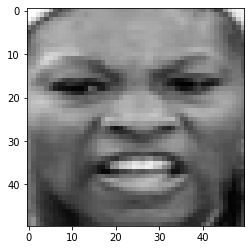

In [ ]:
plt.imshow(images[0], cmap="gray")

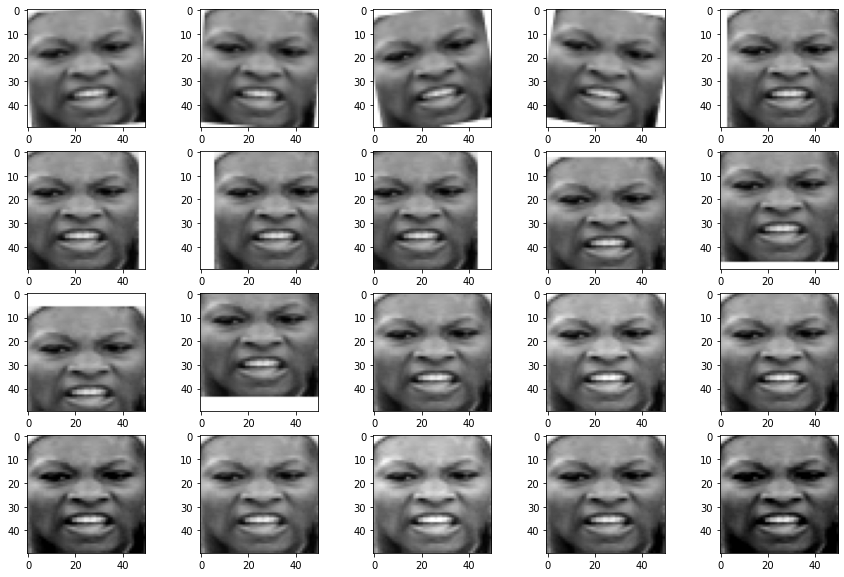

In [ ]:
img_test = images[0]

augmented_image_test = img_augmentation(img_test)

plt.figure(figsize=(15,10))
for i, img in enumerate(augmented_image_test):
    plt.subplot(4,5,i+1)
    plt.imshow(img, cmap="gray")
plt.show()

In [ ]:
augmented_images = []
augmented_names = []
for i, img in enumerate(images):
    try :
        augmented_images.extend(img_augmentation(img))
        augmented_names.extend([names[i]] * 20)
    except :
        print(i)

In [ ]:
len(augmented_images), len(augmented_names)

(24880, 24880)

In [ ]:
images.extend(augmented_images)
names.extend(augmented_names)

In [ ]:
len(images), len(names)

(26124, 26124)

In [ ]:
unique, counts = np.unique(names, return_counts = True)

for item in zip(unique, counts):
    print(item)

('Ariel_Sharon', 1617)
('Colin_Powell', 3150)
('Donald_Rumsfeld', 2541)
('George_W_Bush', 3150)
('Gerhard_Schroeder', 2289)
('Hugo_Chavez', 1491)
('Jacques_Chirac', 1092)
('Jean_Chretien', 1155)
('John_Ashcroft', 1113)
('Junichiro_Koizumi', 1260)
('Serena_Williams', 1092)
('Tony_Blair', 3024)
('devalshah', 3150)


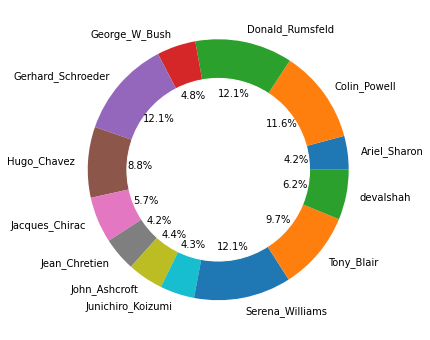

In [ ]:
# preview data distribution

def print_data(label_distr, label_name):
    plt.figure(figsize=(12,6))

    my_circle = plt.Circle( (0,0), 0.7, color='white')
    plt.pie(label_distr, labels=label_name, autopct='%1.1f%%')
    plt.gcf().gca().add_artist(my_circle)
    plt.show()
    
unique = np.unique(names)
label_distr = {i:names.count(i) for i in names}.values()
print_data(label_distr, unique)

In [ ]:
n = 1000

def randc(labels, l):
    return np.random.choice(np.where(np.array(labels) == l)[0], n, replace=False)

mask = np.hstack([randc(names, l) for l in np.unique(names)])

In [ ]:
names = [names[m] for m in mask]
images = [images[m] for m in mask]

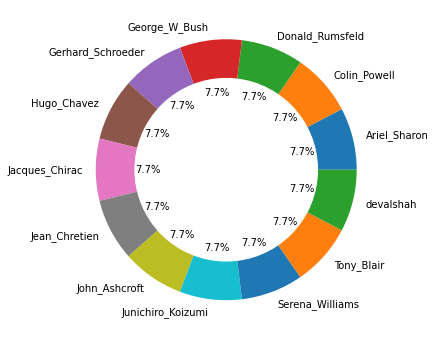

In [ ]:
label_distr = {i:names.count(i) for i in names}.values()
print_data(label_distr, unique)

In [ ]:
len(names)

13000

In [ ]:
le = LabelEncoder()

le.fit(names)

labels = le.classes_

name_vec = le.transform(names)

categorical_name_vec = to_categorical(name_vec)

In [ ]:
print("number of class :", len(labels))
print(labels)

number of class : 13
['Ariel_Sharon' 'Colin_Powell' 'Donald_Rumsfeld' 'George_W_Bush'
 'Gerhard_Schroeder' 'Hugo_Chavez' 'Jacques_Chirac' 'Jean_Chretien'
 'John_Ashcroft' 'Junichiro_Koizumi' 'Serena_Williams' 'Tony_Blair'
 'devalshah']


In [ ]:
print(name_vec)

[ 0  0  0 ... 12 12 12]


In [ ]:
print(categorical_name_vec)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(np.array(images, dtype=np.float32),   # input data
                                                    np.array(categorical_name_vec),       # target/output data 
                                                    test_size=0.15, 
                                                    random_state=42)

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape,  y_test.shape)

(11050, 50, 50) (11050, 13) (1950, 50, 50) (1950, 13)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

In [ ]:
x_train.shape, x_test.shape

((11050, 50, 50, 1), (1950, 50, 50, 1))

In [ ]:
def cnn_model(input_shape):  
    model = Sequential()
    
    model.add(Conv2D(64,
                    (3,3),
                    padding="valid",
                    activation="relu",
                    input_shape=input_shape))
    model.add(Conv2D(64,
                    (3,3),
                    padding="valid",
                    activation="relu",
                    input_shape=input_shape))
    
    model.add(MaxPool2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128,
                    (3,3),
                    padding="valid",
                    activation="relu"))
    model.add(Conv2D(128,
                    (3,3),
                    padding="valid",
                    activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(128, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(len(labels)))  # equal to number of classes
    model.add(Activation("softmax"))
    
    model.summary() 
    
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics = ['accuracy'])

    return model

In [ ]:
input_shape = x_train[0].shape

EPOCHS = 10
BATCH_SIZE = 32

model = cnn_model(input_shape)

history = model.fit(x_train, 
                    y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    shuffle=True,
                    validation_split=0.15   # 15% of train dataset will be used as validation set
                    )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 19, 19, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 128)        0         
 2D)                                                  

In [ ]:
model.save("model-facerecognition.h5")

In [ ]:
# predict test data
y_pred=model.predict(x_test)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 8))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
print(classification_report(y_test.argmax(axis=1), 
                            y_pred.argmax(axis=1), 
                            target_names=labels))

                   precision    recall  f1-score   support

     Ariel_Sharon       0.83      0.91      0.87       161
     Colin_Powell       0.88      0.90      0.89       153
  Donald_Rumsfeld       0.94      0.90      0.92       151
    George_W_Bush       0.95      0.87      0.91       149
Gerhard_Schroeder       0.78      0.90      0.84       159
      Hugo_Chavez       0.94      0.82      0.88       152
   Jacques_Chirac       0.91      0.91      0.91       138
    Jean_Chretien       0.85      0.93      0.89       153
    John_Ashcroft       0.94      0.76      0.84       161
Junichiro_Koizumi       0.99      0.87      0.92       156
  Serena_Williams       0.89      0.96      0.92       144
       Tony_Blair       0.81      0.92      0.86       134
        devalshah       1.00      1.00      1.00       139

         accuracy                           0.89      1950
        macro avg       0.90      0.90      0.90      1950
     weighted avg       0.90      0.89      0.89      

Real Time

In [ ]:
from keras.models import load_model

In [ ]:
def detect_face(img):
    img = img[70:195,78:172]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (50, 50))
    return img

In [ ]:
def print_progress(val, val_len, folder, bar_size=20):
    progr = "#"*round((val)*bar_size/val_len) + " "*round((val_len - (val))*bar_size/val_len)
    if val == 0:
        print("", end = "\n")
    else:
        print("[%s] (%d samples)\t label : %s \t\t" % (progr, val+1, folder), end="\r")

In [ ]:
def draw_ped(img, label, x0, y0, xt, yt, color=(255,127,0), text_color=(255,255,255)):

    (w, h), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    cv2.rectangle(img,
                  (x0, y0 + baseline),  
                  (max(xt, x0 + w), yt), 
                  color, 
                  2)
    cv2.rectangle(img,
                  (x0, y0 - h),  
                  (x0 + w, y0 + baseline), 
                  color, 
                  -1)  
    cv2.putText(img, 
                label, 
                (x0, y0),                   
                cv2.FONT_HERSHEY_SIMPLEX,     
                0.5,                          
                text_color,                
                1,
                cv2.LINE_AA) 
    return img

In [ ]:
model = load_model("C:/Users/Ahmadsami/Desktop/model-facerecognition.h5")

In [ ]:
labels = ['Ariel_Sharon',
          'Colin_Powell',
          'Donald_Rumsfeld',
          'George_W_Bush',
          'Gerhard_Schroeder',
          'Hugo_Chavez',
          'Jacques_Chirac',
          'Jean_Chretien',
          'John_Ashcroft',
          'Junichiro_Koizumi',
          'Serena_Williams',
          'Tony_Blair',
          'Devalshah']

In [ ]:
labels2=np.array(labels)

In [ ]:
# --------- load Haar Cascade model -------------
face_cascade = cv2.CascadeClassifier('C:/Users/Ahmadsami/Desktop/haarcascade_frontalface_default.xml')

# --------- load Keras CNN model -------------
#model = load_model("Desktop\multi_classifier")
print("[INFO] finish load model...")

cap = cv2.VideoCapture(0)
while cap.isOpened() :
    ret, frame = cap.read()
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.1, 5)
        for (x, y, w, h) in faces:
            
            face_img = gray[y:y+h, x:x+w]
            face_img = cv2.resize(face_img, (50, 50))
            face_img = face_img.reshape(1, 50, 50, 1)
            
            result = model.predict(face_img)
            idx = result.argmax(axis=1)
            confidence = result.max(axis=1)*100
            if confidence > 80:
                label_text = "%s (%.2f %%)" % (labels2[idx], confidence)
            else :
                label_text = "N/A"
            frame = draw_ped(frame, label_text, x, y, x + w, y + h, color=(0,255,255), text_color=(50,50,50))
       
        cv2.imshow('Detect Face', frame)
    else :
        break
    if cv2.waitKey(10) == ord('q'):
        break
        
cv2.destroyAllWindows()
cap.release()